### All Data: Consensus Genotype
Size_Sample_Deletions_AllData_6000

* Size Ranges
* Training Dataset size : 6000

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


***
Training Set

Count : 6000
*** 

In [2]:
# Import Training Data
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/6k.DEL.test.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/6k.DEL.test.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.shape

(3944, 187)

In [3]:
train_set = pd.DataFrame()
train_set = df_train_2

In [4]:
train_set['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
train_set['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
train_set['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)

** Count of Labels in Training Set **

<a id='imbalance'></a>

In [5]:
pd.value_counts(train_set['GTcons'].values, sort=False)

Heterozygous_Variant    1810
Homozygous_Reference    1097
Homozygous_Variant      1037
dtype: int64

In [6]:
### Drop columns that are not shared by both dataframes
df_train.drop(['Ill300x.GT'], axis=1, inplace = True)
df_train.drop(['Ill250.GT'], axis=1, inplace = True)
df_train.drop(['IllMP.GT'], axis=1, inplace = True)
df_train.drop(['TenX.GT'], axis=1, inplace = True)
df_train.drop(['pacbio.GT'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)
df_train.drop(['New_ID'], axis=1, inplace = True)

In [7]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)

***
Test Set

Size separated
***

<a id='hom_ref'></a>

In [8]:
# Import Test Data
# SVanalyzer generated training data
df_test_size = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/DEL/All_size_sample_TestSet.csv')
df_test_size_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/DEL/All_size_sample_TestSet.csv')
df_test_size.rename(columns={'size': 'Size'}, inplace=True)
df_test_size.shape

(1102, 187)

In [9]:
### Drop columns that are not shared by both dataframes
df_test_size.drop(['Ill300x.GT'], axis=1, inplace = True)
df_test_size.drop(['Ill250.GT'], axis=1, inplace = True)
df_test_size.drop(['IllMP.GT'], axis=1, inplace = True)
df_test_size.drop(['TenX.GT'], axis=1, inplace = True)
df_test_size.drop(['pacbio.GT'], axis=1, inplace = True)
df_test_size.drop(['GTconflict'], axis=1, inplace = True)
df_test_size.drop(['GTsupp'], axis=1, inplace = True)
df_test_size.drop(['sample'], axis=1, inplace = True)
df_test_size.drop(['SVtype'], axis=1, inplace = True)
df_test_size.drop(['type'], axis=1, inplace = True)
df_test_size.drop(['id'], axis=1, inplace = True)
df_test_size.drop(['New_ID'], axis=1, inplace = True)

In [10]:
df_test_size.head(1)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,981.041667,5.905359,24.0,450.125,87.707522,24.0,0.0,0.0,908.387879,...,11512.80769,4030.669328,26.0,0,0,0,0.0,105733378,0,0.0


In [11]:
df_test_size['chrom'].replace('X', 23, inplace=True)
df_test_size['chrom'].replace('Y', 24, inplace=True)

***
Impute missing values using KNN
***

In [12]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,2,975.403509,22.103314,57.0,431.964912,69.327589,57.0,0.0,0.0,857.418605,...,0.0,0.0,0.0,0,0,0,0.0,3045232,1,1.0
1,2,971.894737,22.069813,57.0,430.964912,69.327589,57.0,0.0,0.0,856.830409,...,0.0,0.0,0.0,0,0,0,0.0,3045233,1,1.0
2,2,978.416667,23.171312,72.0,435.236111,88.399424,72.0,0.0,0.0,864.556150,...,0.0,0.0,0.0,0,0,0,0.0,9652699,0,0.0


In [13]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/3944 with 0 missing, elapsed time: 13.402
Imputing row 101/3944 with 0 missing, elapsed time: 13.402
Imputing row 201/3944 with 0 missing, elapsed time: 13.406
Imputing row 301/3944 with 0 missing, elapsed time: 13.415
Imputing row 401/3944 with 0 missing, elapsed time: 13.421
Imputing row 501/3944 with 0 missing, elapsed time: 13.422
Imputing row 601/3944 with 0 missing, elapsed time: 13.431
Imputing row 701/3944 with 0 missing, elapsed time: 13.437
Imputing row 801/3944 with 59 missing, elapsed time: 13.488
Imputing row 901/3944 with 2 missing, elapsed time: 13.511
Imputing row 1001/3944 with 2 missing, elapsed time: 13.527
Imputing row 1101/3944 with 2 missing, elapsed time: 13.538
Imputing row 1201/3944 with 2 missing, elapsed time: 13.548
Imputing row 1301/3944 with 2 missing, elapsed time: 13.558
Imputing row 1401/3944 with 2 missing, elapsed time: 13.577
Imputing row 1501/3944 with 2 missing, elapsed time: 13.592
Imputing row 1601/3944 with 3 missing, elapsed time

In [14]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,2.0,975.403509,22.103314,57.0,431.964912,69.327589,57.0,0.0,0.0,857.418605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3045232.0,1.0,1.0
1,2.0,971.894737,22.069813,57.0,430.964912,69.327589,57.0,0.0,0.0,856.830409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3045233.0,1.0,1.0
2,2.0,978.416667,23.171312,72.0,435.236111,88.399424,72.0,0.0,0.0,864.556150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9652699.0,0.0,0.0


In [15]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [16]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

2.0    1037
0.0    1097
1.0    1810
dtype: int64

In [17]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [18]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [19]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [20]:
# Train Random Forest Classifier
model = RandomForestClassifier(oob_score=True) 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [21]:
print('The OOB prediction of accuracy is: {oob}%'.format(oob=model.oob_score_ * 100))

The OOB prediction of accuracy is: 95.90579710144928%


In [22]:
sns.set_style("white")

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

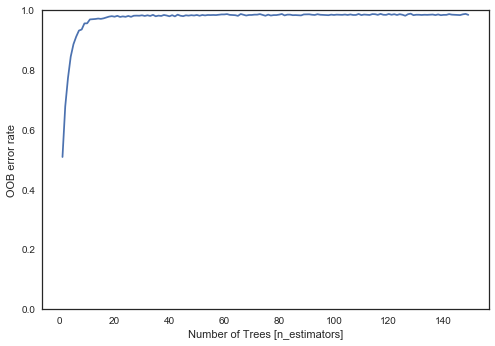

In [23]:
n_estimators = 150
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 
    
    
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob


plt.plot(trees, oob)

plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/6000_train/del_alldata_6000_trees_oob.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [24]:
model = RandomForestClassifier(n_estimators=20, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

In [25]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

In [26]:
pred = model.predict(X_test)

In [27]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Precision score of the training subset: 0.986
Accuracy score of the training subset: 0.986


In [28]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
labels = pd.DataFrame(y_test)

In [29]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']

In [30]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [31]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Reference    329
Homozygous_Variant      311
Heterozygous_Variant    544
dtype: int64

In [32]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Reference    329
Homozygous_Variant      309
Heterozygous_Variant    546
dtype: int64

In [33]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[538   2   4]
 [  3 325   1]
 [  5   2 304]]


In [34]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,538,2,4,544
Homozygous_Reference,3,325,1,329
Homozygous_Variant,5,2,304,311
All,546,329,309,1184


In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.99      0.99      0.99       544
Homozygous_Reference       0.99      0.99      0.99       329
  Homozygous_Variant       0.98      0.98      0.98       311

         avg / total       0.99      0.99      0.99      1184



***
Predict

Predict labels for test set
***

** Load Data **

In [36]:
df_test_size.drop(['GTcons'],axis=1, inplace=True)
X2 = df_test_size

** Impute missing values using KNN **

In [37]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/1102 with 0 missing, elapsed time: 0.935
Imputing row 101/1102 with 0 missing, elapsed time: 0.948
Imputing row 201/1102 with 0 missing, elapsed time: 0.956
Imputing row 301/1102 with 0 missing, elapsed time: 0.962
Imputing row 401/1102 with 0 missing, elapsed time: 0.974
Imputing row 501/1102 with 1 missing, elapsed time: 0.980
Imputing row 601/1102 with 0 missing, elapsed time: 0.987
Imputing row 701/1102 with 0 missing, elapsed time: 0.996
Imputing row 801/1102 with 88 missing, elapsed time: 1.002
Imputing row 901/1102 with 0 missing, elapsed time: 1.012
Imputing row 1001/1102 with 0 missing, elapsed time: 1.025
Imputing row 1101/1102 with 3 missing, elapsed time: 1.039


In [38]:
df_test_header = list(df_test_size.columns.values)
X2.columns = df_test_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,981.041667,5.905359,24.0,450.125,87.707522,24.0,0.0,0.0,908.387879,145.989563,...,11512.80769,4030.669328,26.0,0.0,0.0,0.0,0.0,105733378.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,850.295455,164.256047,...,10081.74194,4322.663725,31.0,0.0,0.0,0.0,0.0,47335234.0,1.0,1.0
2,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,873.292398,165.845792,...,10024.41667,4111.897098,36.0,0.0,0.0,0.0,0.0,2126769.0,1.0,1.0


In [39]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,981.041667,5.905359,24.0,450.125,87.707522,24.0,0.0,0.0,908.387879,145.989563,...,11512.80769,4030.669328,26.0,0.0,0.0,0.0,0.0,105733378.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,850.295455,164.256047,...,10081.74194,4322.663725,31.0,0.0,0.0,0.0,0.0,47335234.0,1.0,1.0
2,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,873.292398,165.845792,...,10024.41667,4111.897098,36.0,0.0,0.0,0.0,0.0,2126769.0,1.0,1.0


In [40]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [41]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [42]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_size_2['chrom']
X5['GTcons'] = df_test_size_2['GTcons']
X5['start'] = df_test_size_2['start']
X5['end'] = df_test_size_2['end']
X5['Size'] = df_test_size_2['Size']
X5['GTsupp'] = df_test_size_2['GTsupp']

In [44]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/size_samp/df_size_sampTest_df1.csv', index=False)

In [45]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/size_samp/df_size_sampTest_df1.csv')

In [46]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [47]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/size_samp/df_size_sampTest_df2.csv', index=False)

In [48]:
X6['GTcons'].dtypes

dtype('int64')

In [49]:
# Drop NaN Labels
X6 = X6[np.isfinite(X6['GTcons'])]
X6 = X6[np.isfinite(X6['predicted_GTcons_label'])]

***
Label Analysis
***

In [50]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[302  15   0]
 [  2 538  17]
 [  0  12 216]]


In [51]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [52]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.958
Accuracy score of the prediction subset: 0.958


In [53]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,538,2,17,557
Homozygous_Reference,15,302,0,317
Homozygous_Variant,12,0,216,228
All,565,304,233,1102


In [54]:
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/size_samp/Test_SizeSamp_All_confMatrix.csv')

** Labels with Pred_Prob >=0.9 **

In [55]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]

In [56]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,476,0,0,476
Homozygous_Reference,0,230,0,230
Homozygous_Variant,0,0,191,191
All,476,230,191,897


In [57]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/size_samp/Test_SizeSamp_All_confMatrix_hi.csv')

In [58]:
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00       476
Homozygous_Reference       1.00      1.00      1.00       230
  Homozygous_Variant       1.00      1.00      1.00       191

         avg / total       1.00      1.00      1.00       897



***
Size Separate Label Analysis
***

In [85]:
#Size Bins
bins = [0, 50, 100,300,400,1000,5999,45516]
X6['Size'] = X6['Size'].abs()
group_names_size = ['0-50', '50-100', '100-300', '300-400', '400-1000', '1000-5999', '6000+']
X6['size_bin'] = pd.cut(X6['Size'], bins, labels=group_names_size)

#Separate dataframes based on size_bin
df_20to50 = X6[X6['size_bin'].str.contains('0-50')]
df_50to100 = X6[X6['size_bin'].str.contains('50-100')]
df_100to300 = X6[X6['size_bin'].str.contains('100-300')]
df_300to400 = X6[X6['size_bin'].str.contains('300-400')]
df_400to1000 = X6[X6['size_bin'].str.contains('400-1000')]
df_1000to6000 = X6[X6['size_bin'].str.contains('1000-5999')]
df_6000 = X6[X6['size_bin'].str.contains('6000+')]

In [60]:
#Confusion Matrices
consensus_GT = df_20to50['GTcons']
predict = df_20to50['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,137,0,2,139
Homozygous_Reference,0,32,0,32
Homozygous_Variant,3,0,26,29
All,140,32,28,200


In [61]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.975
Accuracy score of the prediction subset: 0.975


In [62]:
consensus_GT = df_50to100['GTcons']
predict = df_50to100['predicted_GTcons_label']
print('df_50to100')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_50to100


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,111,1,6,118
Homozygous_Reference,3,48,0,51
Homozygous_Variant,4,0,27,31
All,118,49,33,200


In [63]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.930
Accuracy score of the prediction subset: 0.930


In [64]:
consensus_GT = df_100to300['GTcons']
predict = df_100to300['predicted_GTcons_label']
print('df_100to300')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_100to300


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,79,0,2,81
Homozygous_Reference,6,79,0,85
Homozygous_Variant,0,0,34,34
All,85,79,36,200


In [65]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.960
Accuracy score of the prediction subset: 0.960


In [66]:
consensus_GT = df_300to400['GTcons']
predict = df_300to400['predicted_GTcons_label']
print('df_300to400')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_300to400


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,99,0,5,104
Homozygous_Reference,1,30,0,31
Homozygous_Variant,0,0,65,65
All,100,30,70,200


In [67]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.970
Accuracy score of the prediction subset: 0.970


In [68]:
consensus_GT = df_400to1000['GTcons']
predict = df_400to1000['predicted_GTcons_label']
print('df_400to1000')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_400to1000


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,37,1,2,40
Homozygous_Reference,3,67,0,70
Homozygous_Variant,0,0,14,14
All,40,68,16,124


In [69]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.952
Accuracy score of the prediction subset: 0.952


In [70]:
consensus_GT = df_1000to6000['GTcons']
predict = df_1000to6000['predicted_GTcons_label']
print('df_1000to6000')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_1000to6000


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,63,0,0,63
Homozygous_Reference,2,38,0,40
Homozygous_Variant,5,0,43,48
All,70,38,43,151


In [71]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.954
Accuracy score of the prediction subset: 0.954


In [72]:
consensus_GT = df_6000['GTcons']
predict = df_6000['predicted_GTcons_label']
print('df_6000')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_6000


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,12,0,0,12
Homozygous_Reference,0,8,0,8
Homozygous_Variant,0,0,7,7
All,12,8,7,27


In [73]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 1.000
Accuracy score of the prediction subset: 1.000


In [74]:
#Calculate average pred prob for each group
df_20to50_homVar = df_20to50[df_20to50['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_20to50_hetVar = df_20to50[df_20to50['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_20to50_homRef = df_20to50[df_20to50['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_20to50_homVar.mean()
df_20to50_hetVar.mean()
df_20to50_homRef.mean()
print('20 to 50 bp Hom Var {}'.format(df_20to50_homVar.mean())) 
print('20 to 50 bp Het Var {}'.format(df_20to50_hetVar.mean())) 
print('20 to 50 bp Hom Ref {}'.format(df_20to50_homRef.mean())) 

df_50to100_homVar = df_50to100[df_50to100['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_50to100_hetVar = df_50to100[df_50to100['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_50to100_homRef = df_50to100[df_50to100['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_50to100_homVar.mean()
df_50to100_hetVar.mean()
df_50to100_homRef.mean()
print('50to100 bp Hom Var {}'.format(df_50to100_homVar.mean())) 
print('50to100 bp Het Var {}'.format(df_50to100_hetVar.mean())) 
print('50to100 bp Hom Ref {}'.format(df_50to100_homRef.mean())) 

df_100to300_homVar = df_100to300[df_100to300['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_100to300_hetVar = df_100to300[df_100to300['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_100to300_homRef = df_100to300[df_100to300['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_100to300_homVar.mean()
df_100to300_hetVar.mean()
df_100to300_homRef.mean()
print('100to300 bp Hom Var {}'.format(df_100to300_homVar.mean())) 
print('100to300 bp Het Var {}'.format(df_100to300_hetVar.mean())) 
print('100to300 bp Hom Ref {}'.format(df_100to300_homRef.mean())) 

df_300to400_homVar = df_300to400[df_300to400['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_300to400_hetVar = df_300to400[df_300to400['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_300to400_homRef = df_300to400[df_300to400['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_300to400_homVar.mean()
df_300to400_hetVar.mean()
df_300to400_homRef.mean()
print('300to400 bp Hom Var {}'.format(df_300to400_homVar.mean())) 
print('300to400 bp Het Var {}'.format(df_300to400_hetVar.mean())) 
print('300to400 bp Hom Ref {}'.format(df_300to400_homRef.mean())) 

df_400to1000_homVar = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_400to1000_hetVar = df_400to1000[df_400to1000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_400to1000_homRef = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_400to1000_homVar.mean()
df_400to1000_hetVar.mean()
df_400to1000_homRef.mean()
print('400to1000 bp Hom Var {}'.format(df_400to1000_homVar.mean())) 
print('400to1000 bp Het Var {}'.format(df_400to1000_hetVar.mean())) 
print('400to1000 bp Hom Ref {}'.format(df_400to1000_homRef.mean())) 

df_1000to6000_homVar = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_1000to6000_hetVar = df_1000to6000[df_1000to6000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_1000to6000_homRef = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_1000to6000_homVar.mean()
df_1000to6000_hetVar.mean()
df_1000to6000_homRef.mean()
print('1000to6000 bp Hom Var {}'.format(df_1000to6000_homVar.mean())) 
print('1000to6000 bp Het Var {}'.format(df_1000to6000_hetVar.mean())) 
print('1000to6000 bp Hom Ref {}'.format(df_1000to6000_homRef.mean())) 

df_6000_homVar = df_6000[df_6000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_6000_hetVar = df_6000[df_6000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_6000_homRef = df_6000[df_6000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_6000_homVar.mean()
df_6000_hetVar.mean()
df_6000_homRef.mean()
print('6000 bp Hom Var {}'.format(df_6000_homVar.mean())) 
print('6000 bp Het Var {}'.format(df_6000_hetVar.mean())) 
print('6000 bp Hom Ref {}'.format(df_6000_homRef.mean())) 

20 to 50 bp Hom Var 0.8551724137931033
20 to 50 bp Het Var 0.9582733812949643
20 to 50 bp Hom Ref 0.9140625
50to100 bp Hom Var 0.8209677419354837
50to100 bp Het Var 0.8885593220338986
50to100 bp Hom Ref 0.8656862745098041
100to300 bp Hom Var 0.9205882352941173
100to300 bp Het Var 0.932716049382716
100to300 bp Hom Ref 0.8558823529411763
300to400 bp Hom Var 0.9423076923076928
300to400 bp Het Var 0.9379807692307693
300to400 bp Hom Ref 0.9370967741935483
400to1000 bp Hom Var 0.9535714285714284
400to1000 bp Het Var 0.91875
400to1000 bp Hom Ref 0.8714285714285716
1000to6000 bp Hom Var 0.8927083333333332
1000to6000 bp Het Var 0.976984126984127
1000to6000 bp Hom Ref 0.9262499999999999
6000 bp Hom Var 0.9357142857142858
6000 bp Het Var 0.9916666666666666
6000 bp Hom Ref 0.9625


In [79]:
# Minus 1 Analysis
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/DEL/all_data/5k_Test_Set/6000_train/dataframes/df_alldata_6000_min1_df2.csv')

In [87]:
#Size Bins
bins = [0, 50, 100,300,400,1000,5999,45516]
X6['Size'] = X6['Size'].abs()
group_names_size = ['0-50', '50-100', '100-300', '300-400', '400-1000', '1000-5999', '6000+']
X6['size_bin'] = pd.cut(X6['Size'], bins, labels=group_names_size)


X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

X6['GTcons'] = X6['predicted_GTcons_label']

#Separate dataframes based on size_bin
df_20to50 = X6[X6['size_bin'].str.contains('0-50')]
df_50to100 = X6[X6['size_bin'].str.contains('50-100')]
df_100to300 = X6[X6['size_bin'].str.contains('100-300')]
df_300to400 = X6[X6['size_bin'].str.contains('300-400')]
df_400to1000 = X6[X6['size_bin'].str.contains('400-1000')]
df_1000to6000 = X6[X6['size_bin'].str.contains('1000-5999')]

In [88]:
pd.value_counts(X6['size_bin'].values, sort=True)

400-1000     300
1000-5999    236
100-300      209
50-100       200
0-50         166
300-400      130
6000+          0
dtype: int64

In [89]:
X6.head(1)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,GTsupp,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,size_bin
0,0.016667,0.483333,0.5,Homozygous_Variant,0,924.666667,25.095374,9.0,417.888889,53.899999,...,0.0,Homozygous_Variant,0,0,0,0.0,928347,0,0.0,0-50


In [90]:
#Calculate average pred prob for each group
df_20to50_homVar = df_20to50[df_20to50['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_20to50_hetVar = df_20to50[df_20to50['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_20to50_homRef = df_20to50[df_20to50['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_20to50_homVar.mean()
df_20to50_hetVar.mean()
df_20to50_homRef.mean()
print('20 to 50 bp Hom Var {}'.format(df_20to50_homVar.mean())) 
print('20 to 50 bp Het Var {}'.format(df_20to50_hetVar.mean())) 
print('20 to 50 bp Hom Ref {}'.format(df_20to50_homRef.mean())) 

df_50to100_homVar = df_50to100[df_50to100['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_50to100_hetVar = df_50to100[df_50to100['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_50to100_homRef = df_50to100[df_50to100['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_50to100_homVar.mean()
df_50to100_hetVar.mean()
df_50to100_homRef.mean()
print('50to100 bp Hom Var {}'.format(df_50to100_homVar.mean())) 
print('50to100 bp Het Var {}'.format(df_50to100_hetVar.mean())) 
print('50to100 bp Hom Ref {}'.format(df_50to100_homRef.mean())) 

df_100to300_homVar = df_100to300[df_100to300['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_100to300_hetVar = df_100to300[df_100to300['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_100to300_homRef = df_100to300[df_100to300['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_100to300_homVar.mean()
df_100to300_hetVar.mean()
df_100to300_homRef.mean()
print('100to300 bp Hom Var {}'.format(df_100to300_homVar.mean())) 
print('100to300 bp Het Var {}'.format(df_100to300_hetVar.mean())) 
print('100to300 bp Hom Ref {}'.format(df_100to300_homRef.mean())) 

df_300to400_homVar = df_300to400[df_300to400['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_300to400_hetVar = df_300to400[df_300to400['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_300to400_homRef = df_300to400[df_300to400['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_300to400_homVar.mean()
df_300to400_hetVar.mean()
df_300to400_homRef.mean()
print('300to400 bp Hom Var {}'.format(df_300to400_homVar.mean())) 
print('300to400 bp Het Var {}'.format(df_300to400_hetVar.mean())) 
print('300to400 bp Hom Ref {}'.format(df_300to400_homRef.mean())) 

df_400to1000_homVar = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_400to1000_hetVar = df_400to1000[df_400to1000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_400to1000_homRef = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_400to1000_homVar.mean()
df_400to1000_hetVar.mean()
df_400to1000_homRef.mean()
print('400to1000 bp Hom Var {}'.format(df_400to1000_homVar.mean())) 
print('400to1000 bp Het Var {}'.format(df_400to1000_hetVar.mean())) 
print('400to1000 bp Hom Ref {}'.format(df_400to1000_homRef.mean())) 

df_1000to6000_homVar = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_1000to6000_hetVar = df_1000to6000[df_1000to6000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_1000to6000_homRef = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_1000to6000_homVar.mean()
df_1000to6000_hetVar.mean()
df_1000to6000_homRef.mean()
print('1000to6000 bp Hom Var {}'.format(df_1000to6000_homVar.mean())) 
print('1000to6000 bp Het Var {}'.format(df_1000to6000_hetVar.mean())) 
print('1000to6000 bp Hom Ref {}'.format(df_1000to6000_homRef.mean())) 

20 to 50 bp Hom Var 0.6735632183965516
20 to 50 bp Het Var 0.6553333333599999
20 to 50 bp Hom Ref 0.6863636363636363
50to100 bp Hom Var 0.6775000000166664
50to100 bp Het Var 0.6639730640303033
50to100 bp Hom Ref 0.6626016259999998
100to300 bp Hom Var 0.6539215686470591
100to300 bp Het Var 0.6391472868139534
100to300 bp Hom Ref 0.6996254681460675
300to400 bp Hom Var 0.8034722222916666
300to400 bp Het Var 0.6069444444444445
300to400 bp Hom Ref 0.6800724637608697
400to1000 bp Hom Var 0.6216981132075473
400to1000 bp Het Var 0.6962962962735043
400to1000 bp Hom Ref 0.6674358974076925
1000to6000 bp Hom Var 0.5544444445333333
1000to6000 bp Het Var 0.6347457627118646
1000to6000 bp Hom Ref 0.7196969697045454
